In [13]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc
from prophet_rmse import stock_rmse
import seaborn as sns
import datetime
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [14]:
# Load stock data for a particular ticker
ticker = "TOP"

# Get today's date
today = datetime.datetime.now()

# Subtract one day to get yesterday's date
yesterday = today - datetime.timedelta(days=1)
start = today - datetime.timedelta(days=8)

# Format yesterday's date as a string in yyyy-mm-dd format
yesterday_str = yesterday.strftime("%Y-%m-%d")
start_str = start.strftime("%Y-%m-%d")

raw_data = yf.download(ticker, start=start_str, end=yesterday_str, interval='1m')
raw_data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-20 09:30:00-04:00,6.0300,6.1499,6.0300,6.0750,6.0750,3997
2023-04-20 09:32:00-04:00,6.1500,6.2100,6.0900,6.0900,6.0900,1850
2023-04-20 09:33:00-04:00,6.0900,6.1500,6.0301,6.0301,6.0301,1535
2023-04-20 09:34:00-04:00,6.1499,6.1499,6.1499,6.1499,6.1499,1026
2023-04-20 09:35:00-04:00,6.1500,6.1500,6.1500,6.1500,6.1500,893
2023-04-20 09:37:00-04:00,6.1500,6.1500,6.1015,6.1015,6.1015,1742
2023-04-20 09:38:00-04:00,6.1400,6.1400,6.1400,6.1400,6.1400,105
2023-04-20 09:39:00-04:00,6.2000,6.2000,6.1500,6.2000,6.2000,1114
2023-04-20 09:40:00-04:00,6.3230,6.3389,6.3230,6.3389,6.3389,470


In [15]:
# Prepare data for Prophet model
df = pd.DataFrame({'ds': raw_data.index, 'y': raw_data['Adj Close']})
df.ds = df.ds.dt.tz_localize(None)

df.reset_index(inplace=True, drop=True)
print('done')

# Create and fit the Prophet model
m = Prophet(daily_seasonality=True, changepoint_prior_scale=0.01)

m.fit(df)

# Generate predictions for the next 30 days
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)
print('done')

16:37:16 - cmdstanpy - INFO - Chain [1] start processing


done


16:37:16 - cmdstanpy - INFO - Chain [1] done processing


done


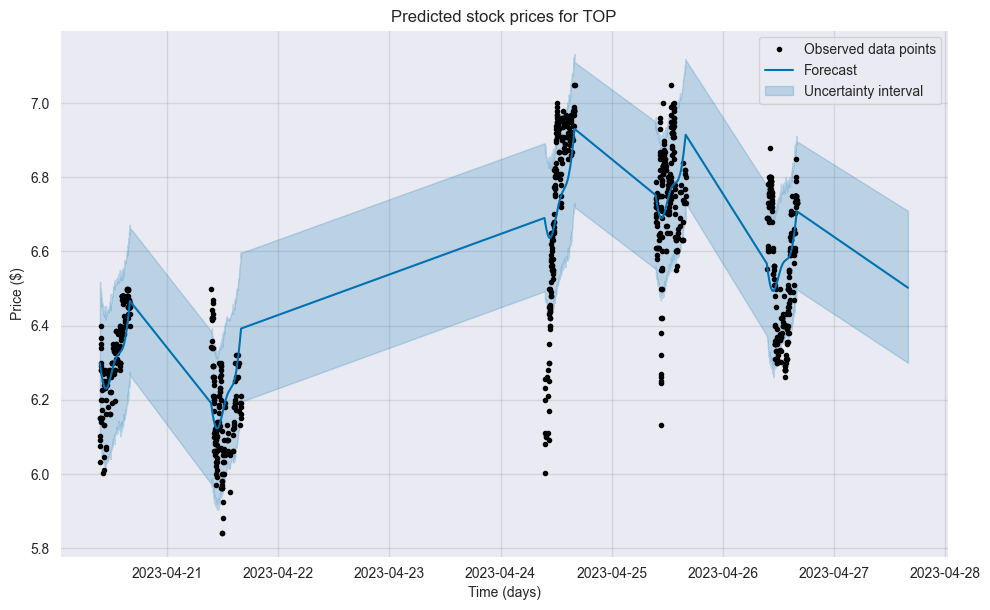

In [16]:
# Plot the predicted prices
fig = m.plot(forecast)
plt.title(f'Predicted stock prices for {ticker}')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()